In [ ]:
# unsupervised machine learning 
''' 
1 . clustering 
    grouping data points so that items in the same group are more similar to each other then to those in other groups
    Example : 
        . k - means clustering - divedes data into k clusers based on similarity.
        . hierachical clustering - builds a tree of clusters.
        . DBSCAN - find clusering of arbitrary shape and detects noise
    . use case :  customer segmentaion , image grouping ,document classification (without labels)
2. Dimensionality reduction
     reducing the number of features while preserving important information.
     . purpose : simplify datasets, remove noise, make visualization easier.
     Example :
      PCA :  principal component analysis  - finds key axes of variation.
      t-sne/umap - good for visualizing high -dimensional data in 2D or 3D
    use case: Compressing data, speeding up machine learning models, feature extraction for images or text.
3. Association Rule Learning
    Finding rules that describe relationships between variables in large datasets.
    Purpose: Discover “if X happens, Y is likely to happen” patterns.
    Examples:
    Apriori algorithm – classic method for market basket analysis.
    FP-Growth – faster rule mining for big datasets.
    Use case: Recommendation systems, market basket analysis (“People who bought bread also bought butter”).
4. Anomaly Detection (sometimes considered a subset)
    Identifying data points that don’t fit the general pattern.
    Purpose: Spot unusual or suspicious items.
    Examples:
        Isolation Forest, One-Class SVM
        Use case: Fraud detection, network security, equipment failure prediction.     
'''

In [ ]:
# k - means clustering 
# each cluster has a centroid (the center point of the cluster)
# the goal is o minimize the distance between data points and their assigned cluster's centroid.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [79]:
X,y= make_blobs(n_samples=300, centers =4, cluster_std = 0.6, random_state=42)

In [80]:
model=KMeans(n_clusters = 4 , random_state= 42)

In [81]:
model.fit(X)

C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [82]:
center = model.cluster_centers_

In [83]:
labels = model.labels_

NameError: name 'centers' is not defined

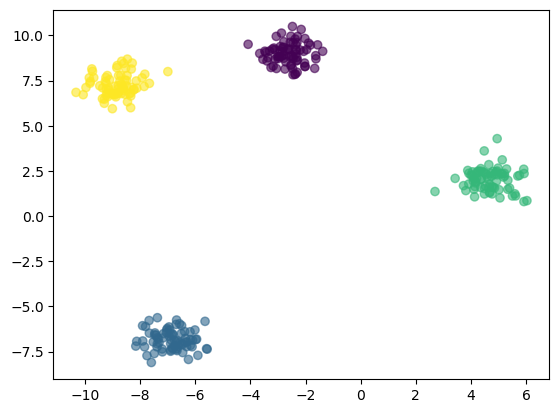

In [84]:
# 4. Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()

In [17]:
# k means clustering
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv(r"C:\Users\GuruKrishna Upputuri\Downloads\penguins.csv")
#df = pd.read_csv(r"C:\Users\GuruKrishna Upputuri\Downloads\OnlineRetail.csv", encoding='ISO-8859-1)


In [19]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [20]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [21]:
df =df.dropna()

In [22]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [25]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [27]:
feature = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']

In [28]:
X=df[feature]

In [29]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [33]:
scaler = StandardScaler()

In [35]:
scaler_X=scaler.fit_transform(X)

In [36]:
model = KMeans(n_clusters= 3, random_state=42)

In [53]:
df['Cluster'] = model.fit_predict(scaler_X)

C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


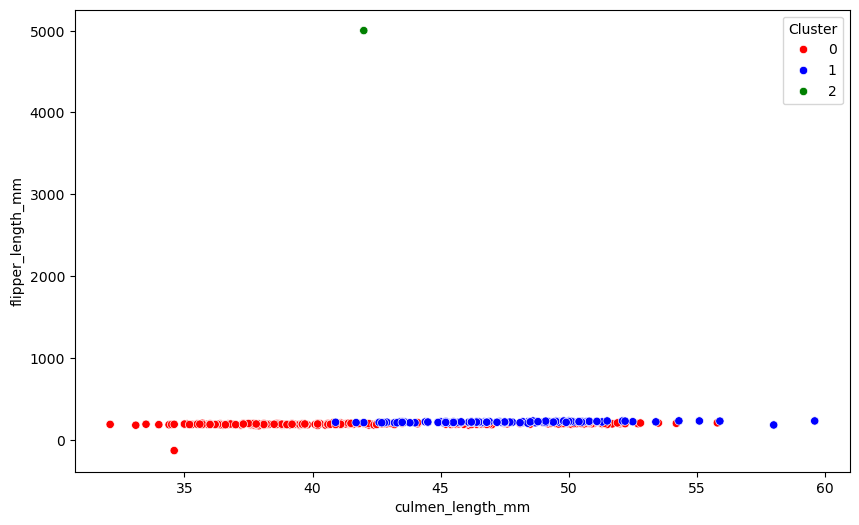

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
custom_palette = ['red', 'blue', 'green']  
sns.scatterplot(
    data=df,
    x='culmen_length_mm',
    y='flipper_length_mm',
    hue='Cluster',
    palette=custom_palette
)
#sns.scatterplot(data=df,color= "green")
plt.show()

In [ ]:
# if you using standardscaler in a unsupervised machine learning 
# it is importing method like from sklearn.preprocessing import StandardScaler
# it is used must 
'''scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)'''

# train_test_split are using supervised machine learning 
# it is importing method like form sklearn.model_selection import train_test_split
# it is using X_train,X_test,y_train,y_test = train_test_split(x,y,testsize=0.2,random_state= 42)

In [56]:
import pandas as pd
df= pd.read_csv(r"C:\Users\GuruKrishna Upputuri\Downloads\ds_excelR\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df.shape

(200, 5)

In [59]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score '], dtype='object')

In [60]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
x=df.iloc[:,[3,4]].values

In [63]:
x.shape

(200, 2)

In [67]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state=45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

In [70]:
kmeans = KMeans(n_clusters =5, init='k-means++',random_state= 42)

In [73]:
y_kmeans=kmeans.fit_predict(x)

C:\Users\GuruKrishna Upputuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0, 0.5, 'spending score')

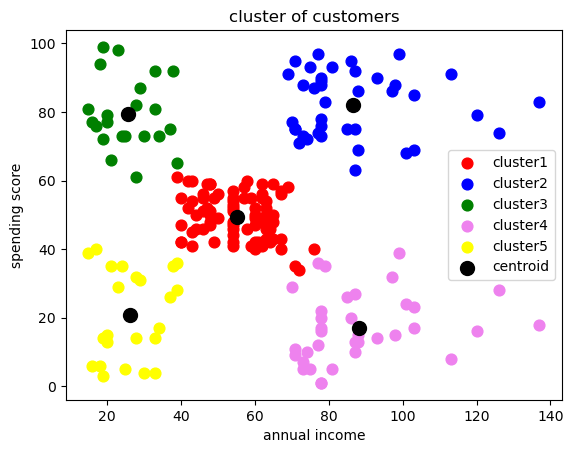

In [75]:
import matplotlib.pyplot as plt
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c="blue",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c="green",label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=60,c="violet",label="cluster4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=60,c="yellow",label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroid")
plt.legend()
plt.title("cluster of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")

In [ ]:
# Hierachical clustering
# hierachical clustering is a for grouping similar data points 
# front like k- means , it build a hierarchy (tree) of clusters
# it starts with each data point as its own cluster, then gradually merges the closetst clusters until all points are in on big cluster.
# this process creates a tree - like diagram called a dengrogram.


In [ ]:
# it main two types are there
# 1. agglomerative(bottom - up)- start - step - end.
#own cluster,merge the two closest clusters, one single clustercontaining all points
#! 2. divisive (top - down)-start - step - end.
# all points in one cluster, split the cluster into smaller ones, each point stands alone

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [88]:
X,y = make_blobs(n_samples =10, centers=3, random_state = 42)

In [89]:
z= linkage(X,method = 'ward')

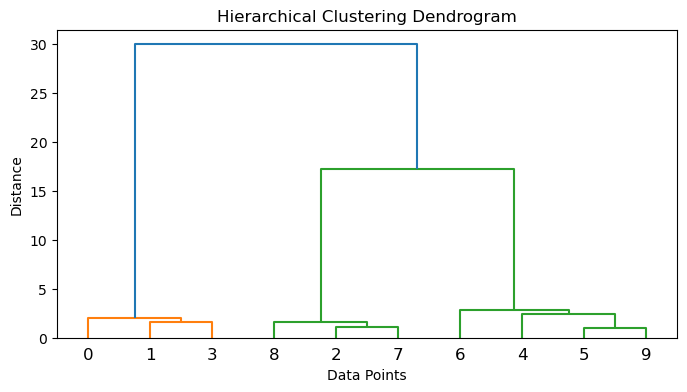

In [91]:
plt.figure(figsize=(8, 4))
dendrogram(z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [94]:

# 2. Scale the features (important for distance-based methods)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
# 3. Apply Agglomerative (bottom-up) clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X_scaled)

In [97]:

# 4. Show results
print("Cluster labels:", labels)

Cluster labels: [1 1 2 1 0 0 0 2 2 0]


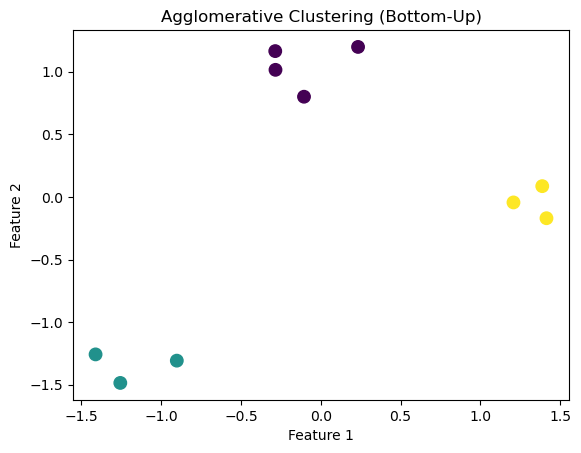

In [98]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=80)
plt.title("Agglomerative Clustering (Bottom-Up)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# DBSCAN - density - based spatial clustring of appliction with noise
# it works noise and shape 
# example like one city 100 collage are there that collage hight students collage group in one cluster lower student are one group  create in dbscan
# it not like k-means and hierachichal clustering



In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [104]:
X,_ = make_moons(n_samples = 300, noise=0.05, random_state=42)
# this is non - linear data 

In [105]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
# this is scale the features (important for distance - based methods)


In [108]:
dbscan = DBSCAN(eps=0.3)
labels = dbscan.fit_predict(X_scaled)
# apply dbscan

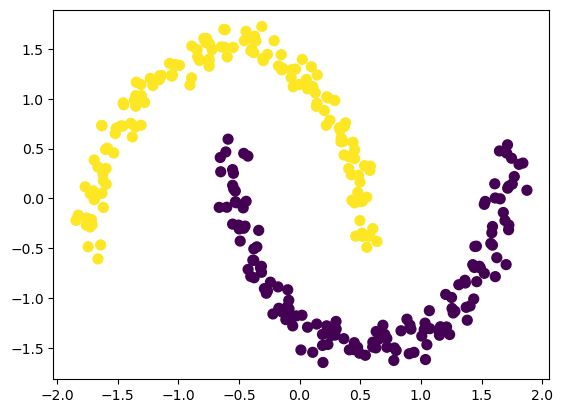

In [109]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels,cmap='viridis',s=50)
plt.show()


In [110]:
print("Cluster lables ", set(labels)) # -1 is noise data

Cluster lables  {0, 1}


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [113]:
df = pd.read_csv(r"C:\Users\GuruKrishna Upputuri\Downloads\Clustering_gmm (2).csv")

In [114]:
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [118]:
df.shape

(500, 2)

In [116]:
df.dropna()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [117]:
df.shape

(500, 2)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [120]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [121]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [122]:
X = df[['Weight', 'Height']]

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
dbscan =DBSCAN(eps=0.02)
labels = dbscan.fit_predict(X_scaled)

In [125]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

C:\Users\GuruKrishna Upputuri\AppData\Local\Temp\ipykernel_29504\3567609314.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


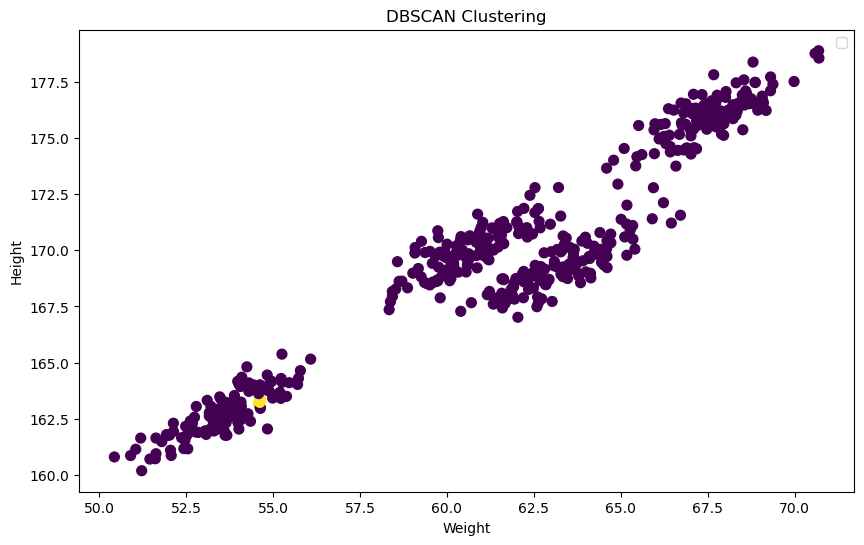

In [132]:
'''plt.scatter(X['Weight'],X['Height'],c= labels, cmap="viridis",s=50)
plt.title("dbscan cluster")
plt.xlabel("weight")
plt.ylabel("hight")
plt.show()'''
plt.figure(figsize=(10,6))
plt.scatter(X['Weight'], X['Height'], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()


In [139]:
# optics 
# deep in dbscan is optics

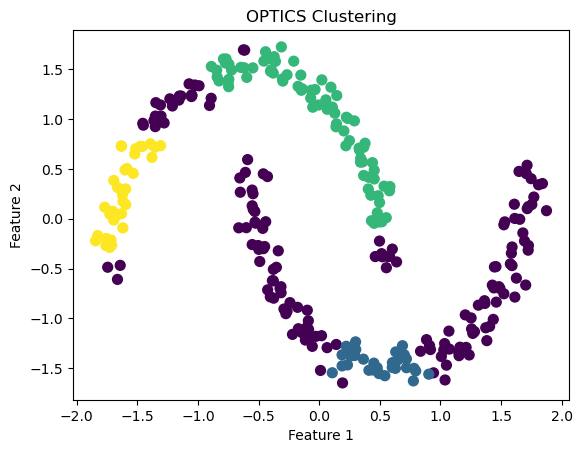

Cluster labels: {0, 1, 2, -1}


In [133]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# 1. Create sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X_scaled)

# 4. Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Cluster labels:", set(labels))  # -1 is noise


In [138]:
'''
import pandas as pd
df.DataFrames[X]'''
import pandas as pd

# Create a DataFrame from scaled features
df = pd.DataFrame(X_scaled, columns=['Feature_1', 'Feature_2'])

# Add cluster labels
df['Cluster'] = labels

# Display the first few rows
print(df.head())


   Feature_1  Feature_2  Cluster
0   0.140368  -1.262610       -1
1   1.613810  -0.786482       -1
2  -0.655067   0.409742       -1
3   0.498316  -0.031728        1
4   0.781636  -1.502383        0


In [ ]:
#    Dimensionality Reduction

In [164]:
# pca - principal component analysis
# pca is decrease pixle size  most import only stay
#pca like 1 mb to 1kb canverted

In [165]:
# summarize your data with fewer variables while keeping most of the important information

In [166]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [167]:
iris= load_iris()

In [168]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [169]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [175]:
# scaler feature
scaler = StandardScaler()
X_scated = scaler.fit_transform(df)

In [176]:
pca = PCA(n_components = 2)
X_pca= pca.fit_transform(X_scaled)

In [178]:
print(X_pca.shape)      # (150, 2)
print(iris.target.shape)  # (150,)


(300, 2)
(150,)


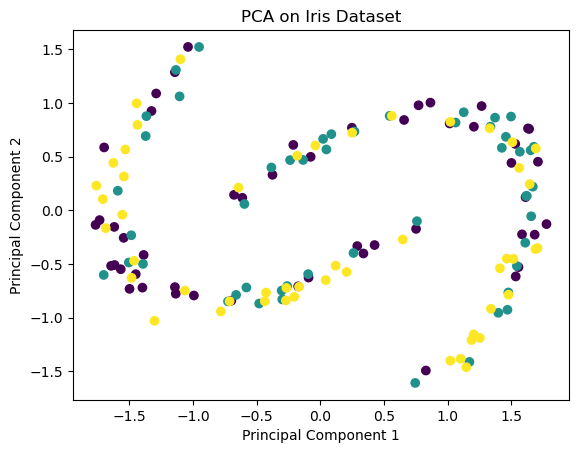

In [179]:
'''plt.figure(figsize=(10,6))
plt.scatter(labels[:,0],labels[:,1],c=iris.target,cmap="viridis")
plt.xlabel("principal component1")
plt.ylabel ("principal component2")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X['Weight'], X['Height'], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()
'''
plt.scatter(X_pca[:150, 0], X_pca[:150, 1], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

In [180]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.7229774 0.2770226]


In [ ]:
# t-sns is 2d to 3d small data , local data
# umap is lang data visualizations ,global data advanced techniqe
# exmple  songs data 
# sample 10 songs are choose based on a similarity to conveated a groups 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
iris = load_iris()

In [3]:
X = iris.data

In [4]:
y = iris.target

In [6]:
X_scaler=StandardScaler().fit_transform(X)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [7]:
tsne =TSNE(n_components= 2 , random_state=42)
X_tsne = tsne.fit_transform(X_scaler)

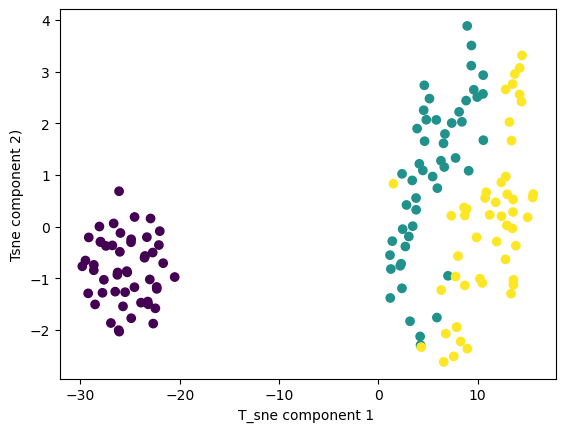

In [10]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, cmap='viridis')
plt.xlabel("T_sne component 1 ")
plt.ylabel("Tsne component 2)")
plt.show()

In [ ]:
# umap - uniform manifold approximation and projection 
# it is  dimensinality reduction algorithm like t-sne or pca

In [52]:
'''import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap


# Load example dataset
digits = load_digits()
data = StandardScaler().fit_transform(digits.data)

# Create and fit UMAP model
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(data)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.colorbar(boundaries=range(11))
plt.title("UMAP projection of the Digits dataset")
plt.show()
'''

'import umap\nimport matplotlib.pyplot as plt\nfrom sklearn.datasets import load_digits\nfrom sklearn.preprocessing import StandardScaler\nimport umap.umap_ as umap\n\n\n# Load example dataset\ndigits = load_digits()\ndata = StandardScaler().fit_transform(digits.data)\n\n# Create and fit UMAP model\nreducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)\nembedding = reducer.fit_transform(data)\n\n# Plot the result\nplt.figure(figsize=(8, 6))\nplt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap=\'Spectral\', s=5)\nplt.colorbar(boundaries=range(11))\nplt.title("UMAP projection of the Digits dataset")\nplt.show()\n'

In [ ]:
# apriori algritham
# it is market basker data
# one library are there you will be choose one book that fast access.

In [56]:
import pandas as pd
from mlxtend.frequent_petterns import apriori, association_rules

ModuleNotFoundError: No module named 'mlxtend.frequent_petterns'

In [55]:
!pip install mlxtend


In [57]:
# pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Example dataset
dataset = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'eggs', 'butter']
]

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 1: Find frequent itemsets
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("Frequent Itemsets:\n", frequent_itemsets)
print("\nRules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
    support       itemsets
0      0.8         (milk)
1      0.8         (eggs)
2      0.8        (bread)
3      0.6   (milk, eggs)
4      0.6  (bread, eggs)
5      0.6  (bread, milk)

Rules:
   antecedents consequents  support  confidence    lift
0      (milk)      (eggs)      0.6        0.75  0.9375
1      (eggs)      (milk)      0.6        0.75  0.9375
2     (bread)      (eggs)      0.6        0.75  0.9375
3      (eggs)     (bread)      0.6        0.75  0.9375
4     (bread)      (milk)      0.6        0.75  0.9375
5      (milk)     (bread)      0.6        0.75  0.9375
